##Initialisation

In [ ]:
#!pip install plotly
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Mount the google drive

In [ ]:
try:
  # Try to connect to google drive for loading data if running on colab
  from google.colab import drive
  drive.mount('/content/drive')
  running_on_colab = True
except:
  running_on_colab = False

Mounted at /content/drive



### You need to upload the data file to your google drive and specify it below as a new input_path line, uncommend as appropriate

In [ ]:
if not running_on_colab:
  pass input_path = 'path-integration-forget/data/3_parameters_results_correct_Nl_range_combined_01Ded2022/with_factor_distance_scaling_factor_3/'
else:
  input_path = '/content/drive/MyDrive/Journals/Bump Attractors and Path Integration/Data/Documents/Research/PhD/Projects/Recurrent_Net_Memory/Attractor_Based_Memory_Plaussibility_Study/path-integration-forget/data/'
  # input_path = '/content/drive/MyDrive/Attractor_Based_Memory_Plaussibility_Study/'

input_file = 'path_analysis_calculation_results_3parameters_MSE_values_slice_t_max_8.npz' # This is the non unwrapped recordings. This is the first 8 waiting periods.
#input_file = 'path_analysis_calculation_results_3parameters_MSE_values_slice_t_max_11.npz' # This is the non unwrapped recordings. This is with 3 additional waiting periods.
input_filename = os.path.join(input_path, input_file)


### Load and organise the data

In [ ]:
MSE_dict = np.load(input_filename, allow_pickle=True)['arr_0'][()]

#The structure of the dictionary is dict[measure][wait_noise_sd_str][mem_Nl_str][mem_r_str] = MSE value
measures = ["Homing_Distance_Median", 
            "Distance_to_Nest_Dispersion_MAD", 
            "Distance_to_Nest_Dispersion_MAD2", 
            "Distance_to_Nest_Accuracy", 
            "Homing_Angle_Accuracy" ] 

measures = ["Homing_Distance_Median_tocntr", 
            "Homing_Distance_Median_toturn", 
            "Distance_to_Nest_Dispersion_MAD_tocntr", 
            "Distance_to_Nest_Dispersion_MAD_toturn", 
            "Distance_to_Nest_Dispersion_MAD2_tocntr", 
            "Distance_to_Nest_Dispersion_MAD2_toturn", 
            "Distance_to_Nest_Accuracy_tocntr", 
            "Distance_to_Nest_Accuracy_toturn", 
            "Homing_Angle_Accuracy_tocntr", 
            "Homing_Angle_Accuracy_toturn" ]
            # these are criteria we can use to find the best match

# The parameters of the model are
mem_noise_list = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.008, 0.009, 0.01, 0.015, 0.02] # diffusion coefficient
#mem_noise_list = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.009, 0.01, 0.015, 0.02] # diffusion coefficient

# First data collection: collected using wrong Nl range: data in 3_params_scanning_wrong_Nl_range/
mem_Nl_list = [0.0, 0.002, 0.004, 0.006,  0.008,  0.01, 0.012, 0.014, 0.016, 0.018, 0.02] # the logistic decay parameter
mem_r_list = [-0.008, -0.010, -0.012, -0.014, -0.016, -0.018, -0.020,  -0.022,  -0.024, -0.026, -0.028, -0.030, -0.032] # another logistic decay parameter

# New data collection: collected using the correct Nl range: data in 3_params_scanning_correct_Nl_range/
mem_Nl_list = [0.0, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2] # the x intercept parameter of the logistic decay
mem_r_list = [-0.008, -0.010, -0.012, -0.014, -0.015, -0.016, -0.017, -0.018, -0.019, -0.020, -0.021, -0.022, -0.023, -0.024, -0.025, -0.026, -0.027, -0.028, -0.029, -0.030, -0.031, -0.032] # the slope parameter of the logistic decay

# Newest data collection: combining the last and additional collected data: data in 3_params_scanning_correct_Nl_range/
mem_Nl_list =  [0.0, 0.001, 0.01, 0.016, 0.018, 0.019, 0.02, 0.021, 0.022, 0.025, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.5, 0.999, 1.3] # 25
mem_r_list = [-0.008, -0.01, -0.012, -0.014, -0.015, -0.016, -0.017, -0.018, -0.019, -0.02, -0.021, -0.022, -0.023, -0.024, -0.025, -0.026, -0.027, -0.028, -0.029, -0.03, -0.031, -0.032, -0.035, -0.04, -0.045, -0.05, -0.1] # 27

# Extra data collection: explore additional region of the search space
#mem_Nl_list =  [0.0, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01]
#mem_r_list =   [-0.033, -0.034, -0.035, -0.036, -0.037, -0.038, -0.039, -0.04, -0.041, -0.042]

new_dict = {}
new_list = []

#The numerical keys are converted to string before used:
for wait_noise_sd in mem_noise_list:
    wait_noise_sd_str = str(wait_noise_sd)
    for mem_Nl in mem_Nl_list:
        mem_Nl_str = str(mem_Nl)
        for mem_r in mem_r_list:
            mem_r_str = str(mem_r)
            key = (wait_noise_sd,mem_Nl,mem_r)
            values = [MSE_dict[measure][wait_noise_sd_str][mem_Nl_str][mem_r_str] for measure in measures]
            new_dict[key] = values
            new_list.append((wait_noise_sd,mem_Nl,mem_r,*values))


## Convert to pandas

In [ ]:
df = pd.DataFrame.from_dict(new_list)
columns=['wait_noise','mem_Nl','mem_r'] + [f'MSE_{m}' for m in measures]
df = df.rename(columns={i: col for i,col in enumerate(columns)})

In [ ]:
df.keys()

Index(['wait_noise', 'mem_Nl', 'mem_r', 'MSE_Homing_Distance_Median_tocntr',
       'MSE_Homing_Distance_Median_toturn',
       'MSE_Distance_to_Nest_Dispersion_MAD_tocntr',
       'MSE_Distance_to_Nest_Dispersion_MAD_toturn',
       'MSE_Distance_to_Nest_Dispersion_MAD2_tocntr',
       'MSE_Distance_to_Nest_Dispersion_MAD2_toturn',
       'MSE_Distance_to_Nest_Accuracy_tocntr',
       'MSE_Distance_to_Nest_Accuracy_toturn',
       'MSE_Homing_Angle_Accuracy_tocntr', 'MSE_Homing_Angle_Accuracy_toturn'],
      dtype='object')

## Visualization

### Choose a measure and plot it

In [ ]:
# Parameter keys: 'mem_Nl' 'mem_r' 'wait_noise'
# Measures keys: 
#       'MSE_Homing_Distance_Median_tocntr', 
#       'MSE_Homing_Distance_Median_toturn', 
#       'MSE_Distance_to_Nest_Dispersion_MAD_tocntr', 
#       'MSE_Distance_to_Nest_Dispersion_MAD_toturn', 
#       'MSE_Distance_to_Nest_Dispersion_MAD2_tocntr', 
#       'MSE_Distance_to_Nest_Dispersion_MAD2_toturn', 
#       'MSE_Distance_to_Nest_Accuracy_tocntr', 
#       'MSE_Distance_to_Nest_Accuracy_toturn', 
#       'MSE_Homing_Angle_Accuracy_tocntr', 
#       'MSE_Homing_Angle_Accuracy_toturn'
#       'Combination_x11111'                           # The combined MSE measure

# Choose Measure from above to plot
measure = 'MSE_Homing_Distance_Median_tocntr'
#measure = 'Combination_x11111' # Can also show the plots for the combined MSE after running some of the following cells.

list_of_plots = [('wait_noise', 'mem_Nl', measure, 1, 1), 
                 ('wait_noise', 'mem_r' , measure, 1, 2), 
                 ('mem_Nl'    , 'mem_r' , measure, 2, 1)]

from plotly.subplots import make_subplots

#fig = make_subplots(rows=2, cols=2,
#                    specs=[[{'is_3d': True}, {'is_3d': True}],
#                           [{'is_3d': True}, {'is_3d': True}]])
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{'type': 'scene'}, {'type': 'scene'}], 
                           [{'type': 'scene'}, {'type': 'scene'}]], 
                           horizontal_spacing = 0.01, 
                           vertical_spacing = 0.01)

for sub_i,key_set in enumerate(list_of_plots): 
  key_x, key_y, key_z, row, col = key_set
  
  X = np.unique(df[key_x])
  Y = np.unique(df[key_y])
  
  Z = np.empty((len(X),len(Y)))

  for i,x in enumerate(X):
      for j,y in enumerate(Y):
          v = df[key_z][(df[key_x]==x) & (df[key_y]==y)]
          Z[i,j] = v.mean() # mean over the remaining parameter

# print(X.shape,Y.shape,Z.shape)
        
# axes = plt.figure().gca(projection='3d')
# axes.plot_surface(X.reshape((-1,1)), 
#                   Y.reshape((1,-1)),
#                   Z)

  scene = dict(xaxis = dict(
              title=key_x),
              yaxis = dict(
                  title=key_y),
              zaxis = dict(
                  title=key_z),)

  fig.add_trace(go.Surface(x=X, y=Y, z=Z), row=row, col=col)
  # Set the axis' labels
  fig.get_subplot(row=row, col=col).update(
                  xaxis_title_text = key_x, 
                  yaxis_title_text = key_y,
                  zaxis_title_text = key_z)

fig.update_layout(title=key_z, autosize=True,
                  width=1000, height=1000)

fig.show()

### Plot all measures as subplots of one figure (greyness is MSE)

In [ ]:
# Parameter keys: 'mem_Nl' 'mem_r' 'wait_noise'
# Measures keys: 
#       'MSE_Homing_Distance_Median_tocntr', 
#       'MSE_Homing_Distance_Median_toturn', 
#       'MSE_Distance_to_Nest_Dispersion_MAD_tocntr', 
#       'MSE_Distance_to_Nest_Dispersion_MAD_toturn', 
#       'MSE_Distance_to_Nest_Dispersion_MAD2_tocntr', 
#       'MSE_Distance_to_Nest_Dispersion_MAD2_toturn', 
#       'MSE_Distance_to_Nest_Accuracy_tocntr', 
#       'MSE_Distance_to_Nest_Accuracy_toturn', 
#       'MSE_Homing_Angle_Accuracy_tocntr', 
#       'MSE_Homing_Angle_Accuracy_toturn'
list_of_plots = [('mem_Nl'    , 'mem_r' , 'wait_noise', 'MSE_Homing_Distance_Median_tocntr'          , 1, 1), 
                 ('mem_Nl'    , 'mem_r' , 'wait_noise', 'MSE_Distance_to_Nest_Dispersion_MAD_tocntr' , 2, 1), 
                 ('mem_Nl'    , 'mem_r' , 'wait_noise', 'MSE_Distance_to_Nest_Dispersion_MAD2_tocntr', 2, 2), 
                 ('mem_Nl'    , 'mem_r' , 'wait_noise', 'MSE_Distance_to_Nest_Accuracy_tocntr'       , 3, 1), 
                 ('mem_Nl'    , 'mem_r' , 'wait_noise', 'MSE_Homing_Angle_Accuracy_tocntr'           , 3, 2)]

from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, 
                    specs=[[{'is_3d': True}, {'is_3d': True}],
                           [{'is_3d': True}, {'is_3d': True}],
                           [{'is_3d': True}, {'is_3d': True}]], 
                           horizontal_spacing = 0.02, 
                           vertical_spacing = 0.02,
                    subplot_titles=('MSE_Homing_Distance_Median', 
                                    '', 
                                    'MSE_Distance_to_Nest_Dispersion_MAD', 
                                    'MSE_Distance_to_Nest_Dispersion_MAD2', 
                                    'MSE_Distance_to_Nest_Accuracy', 
                                    'MSE_Homing_Angle_Accuracy'))

for sub_i,key_set in enumerate(list_of_plots): 
  key_x, key_y, key_z, measure, row, col = key_set
  
  X = np.unique(df[key_x])
  Y = np.unique(df[key_y])
  Z = np.unique(df[key_z])
  
  V = np.empty((len(X),len(Y),len(Z)))
  
  fig.add_trace(go.Scatter3d(x=df[key_x], y=df[key_y], z=df[key_z], 
                             mode='markers',
                             marker=dict(
                              size=5,
                              color=df[measure]/df[measure].max(),                # set color to an array/list of desired values
                              colorscale='Greys',   # choose a colorscale
                              opacity=0.8,
                              colorbar=dict(thickness=20)
                             )), row=row, col=col)
  # Set the axis' labels
  fig.get_subplot(row=row, col=col).update(
                  xaxis_title_text = key_x, 
                  yaxis_title_text = key_y,
                  zaxis_title_text = key_z)

fig.update_layout(title=key_z, autosize=True,
                  width=1000, height=1500)

fig.show()

## Find optimal combination of parameters. These are the logistic function Nl and r and the diffusion coefficient (noise)

In [ ]:
df

,wait_noise,mem_Nl,mem_r,MSE_Homing_Distance_Median_tocntr,MSE_Homing_Distance_Median_toturn,MSE_Distance_to_Nest_Dispersion_MAD_tocntr,MSE_Distance_to_Nest_Dispersion_MAD_toturn,MSE_Distance_to_Nest_Dispersion_MAD2_tocntr,MSE_Distance_to_Nest_Dispersion_MAD2_toturn,MSE_Distance_to_Nest_Accuracy_tocntr,MSE_Distance_to_Nest_Accuracy_toturn,MSE_Homing_Angle_Accuracy_tocntr,MSE_Homing_Angle_Accuracy_toturn
0,0.00,0.0,-0.008,13.416729,13.568211,17.225396,10.508262,1493.436316,1213.672719,0.327169,0.222342,0.213469,0.236504
1,0.00,0.0,-0.010,13.416729,13.568211,17.225396,10.508262,1493.436316,1213.672719,0.327169,0.222342,0.213469,0.236504
2,0.00,0.0,-0.012,13.416729,13.568211,17.225396,10.508262,1493.436316,1213.672719,0.327169,0.222342,0.213469,0.236504
3,0.00,0.0,-0.014,13.416729,13.568211,17.225396,10.508262,1493.436316,1213.672719,0.327169,0.222342,0.213469,0.236504
4,0.00,0.0,-0.015,13.416729,13.568211,17.225396,10.508262,1493.436316,1213.672719,0.327169,0.222342,0.213469,0.236504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,0.02,1.3,-0.035,36.954718,42.114786,139.607122,90.941397,52920.740589,24630.969925,0.294794,0.314811,0.310570,0.235733
10121,0.02,1.3,-0.040,41.074515,41.160140,142.540957,86.186206,63154.657065,24045.924971,0.185560,0.213691,0.251715,0.216816
10122,0.02,1.3,-0.045,30.743412,36.044229,129.796424,77.239274,49539.417023,20489.956440,0.258987,0.282922,0.221820,0.215274
10123,0.02,1.3,-0.050,41.598626,44.001120,141.680424,91.888007,59262.807596,27010.941156,0.235292,0.277370,0.309757,0.232580


In [ ]:
# Minimal MSE_Homing_Distance_Median_tocntr for noise=0.0 are for these Nl and r combinations
df2.loc[df2['wait_noise']==0.0].sort_values(by=['MSE_Homing_Distance_Median_tocntr'])

,wait_noise,mem_Nl,mem_r,MSE_Homing_Distance_Median_tocntr,MSE_Homing_Distance_Median_toturn,MSE_Distance_to_Nest_Dispersion_MAD_tocntr,MSE_Distance_to_Nest_Dispersion_MAD_toturn,MSE_Distance_to_Nest_Dispersion_MAD2_tocntr,MSE_Distance_to_Nest_Dispersion_MAD2_toturn,MSE_Distance_to_Nest_Accuracy_tocntr,MSE_Distance_to_Nest_Accuracy_toturn,MSE_Homing_Angle_Accuracy_tocntr,MSE_Homing_Angle_Accuracy_toturn,Combination_x11111
169,0.0,0.020,-0.018,0.091471,0.194855,2.135512,1.593406,305.214591,290.522476,0.043919,0.071237,0.175323,0.116398,0.632096
222,0.0,0.022,-0.017,0.096167,0.788685,2.303574,1.317087,332.862819,209.819109,0.072641,0.082601,0.131904,0.154496,0.584193
275,0.0,0.030,-0.016,0.105647,0.454538,1.929022,1.512183,304.114942,238.296233,0.039574,0.106644,0.178754,0.108267,0.629590
142,0.0,0.019,-0.018,0.112415,0.652561,2.411076,1.165418,316.802489,220.150720,0.066547,0.066519,0.142262,0.096093,0.598593
196,0.0,0.021,-0.018,0.116320,0.150312,2.009950,1.693375,314.422447,305.573222,0.032510,0.070410,0.157050,0.119951,0.549067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0.0,0.500,-0.018,46.280821,47.427341,49.959909,49.707610,14074.544828,10683.764707,0.074324,0.106551,0.018301,0.068019,1.083665
619,0.0,0.500,-0.050,46.303959,48.239897,64.819693,60.688262,18010.696274,15165.339329,0.070828,0.096879,0.069525,0.038722,1.297514
599,0.0,0.500,-0.016,46.366888,44.082174,42.719353,40.848117,10445.805542,8017.210570,0.089480,0.109846,0.021851,0.022245,1.098213
603,0.0,0.500,-0.020,46.816782,47.406874,48.297332,46.851021,12128.142738,9719.126647,0.080663,0.115102,0.017294,0.027345,1.095805


### Print minima

In [ ]:
# Parameter keys: 'mem_Nl' 'mem_r' 'wait_noise'
# Measures keys: 
#       'MSE_Homing_Distance_Median_tocntr', 
#       'MSE_Homing_Distance_Median_toturn', 
#       'MSE_Distance_to_Nest_Dispersion_MAD_tocntr', 
#       'MSE_Distance_to_Nest_Dispersion_MAD_toturn', 
#       'MSE_Distance_to_Nest_Dispersion_MAD2_tocntr', 
#       'MSE_Distance_to_Nest_Dispersion_MAD2_toturn', 
#       'MSE_Distance_to_Nest_Accuracy_tocntr', 
#       'MSE_Distance_to_Nest_Accuracy_toturn', 
#       'MSE_Homing_Angle_Accuracy_tocntr', 
#       'MSE_Homing_Angle_Accuracy_toturn'

measures = ['MSE_Homing_Distance_Median_tocntr', 'MSE_Homing_Distance_Median_toturn', 
            'MSE_Distance_to_Nest_Dispersion_MAD_tocntr', 'MSE_Distance_to_Nest_Dispersion_MAD_toturn', 
            'MSE_Distance_to_Nest_Dispersion_MAD2_tocntr', 'MSE_Distance_to_Nest_Dispersion_MAD2_toturn',  
            'MSE_Distance_to_Nest_Accuracy_tocntr', 'MSE_Distance_to_Nest_Accuracy_toturn', 
            'MSE_Homing_Angle_Accuracy_tocntr', 'MSE_Homing_Angle_Accuracy_toturn']
for measure in measures:
  print(measure + ':')
  results = df.loc[df[measure].idxmin()]
  print(results)
  print()

MSE_Homing_Distance_Median_tocntr:
wait_noise                                       0.002000
mem_Nl                                           0.020000
mem_r                                           -0.018000
MSE_Homing_Distance_Median_tocntr                0.059145
MSE_Homing_Distance_Median_toturn                0.184599
MSE_Distance_to_Nest_Dispersion_MAD_tocntr       1.819355
MSE_Distance_to_Nest_Dispersion_MAD_toturn       1.625292
MSE_Distance_to_Nest_Dispersion_MAD2_tocntr    319.982376
MSE_Distance_to_Nest_Dispersion_MAD2_toturn    301.483427
MSE_Distance_to_Nest_Accuracy_tocntr             0.028907
MSE_Distance_to_Nest_Accuracy_toturn             0.119115
MSE_Homing_Angle_Accuracy_tocntr                 0.089115
MSE_Homing_Angle_Accuracy_toturn                 0.128400
Name: 1519, dtype: float64

MSE_Homing_Distance_Median_toturn:
wait_noise                                       0.000000
mem_Nl                                           0.021000
mem_r                           

### Calculate combined MSE

In [ ]:
# Calculate normalised MSE
MSE_Homing_Distance_Median_norm_tocntr = df['MSE_Homing_Distance_Median_tocntr'] / df['MSE_Homing_Distance_Median_tocntr'].max()
MSE_Homing_Distance_Median_norm_toturn = df['MSE_Homing_Distance_Median_toturn'] / df['MSE_Homing_Distance_Median_toturn'].max()
MSE_Distance_to_Nest_Dispersion_MAD_norm_tocntr = df['MSE_Distance_to_Nest_Dispersion_MAD_tocntr'] / df['MSE_Distance_to_Nest_Dispersion_MAD_tocntr'].max()
MSE_Distance_to_Nest_Dispersion_MAD_norm_toturn = df['MSE_Distance_to_Nest_Dispersion_MAD_toturn'] / df['MSE_Distance_to_Nest_Dispersion_MAD_toturn'].max()
MSE_Distance_to_Nest_Dispersion_MAD2_norm_tocntr = df['MSE_Distance_to_Nest_Dispersion_MAD2_tocntr'] / df['MSE_Distance_to_Nest_Dispersion_MAD2_tocntr'].max()
MSE_Distance_to_Nest_Dispersion_MAD2_norm_toturn = df['MSE_Distance_to_Nest_Dispersion_MAD2_toturn'] / df['MSE_Distance_to_Nest_Dispersion_MAD2_toturn'].max()
MSE_Distance_to_Nest_Accuracy_norm_tocntr = df['MSE_Distance_to_Nest_Accuracy_tocntr'] / df['MSE_Distance_to_Nest_Accuracy_tocntr'].max()
MSE_Distance_to_Nest_Accuracy_norm_toturn = df['MSE_Distance_to_Nest_Accuracy_toturn'] / df['MSE_Distance_to_Nest_Accuracy_toturn'].max()
MSE_Homing_Angle_Accuracy_norm_tocntr = df['MSE_Homing_Angle_Accuracy_tocntr'] / df['MSE_Homing_Angle_Accuracy_tocntr'].max()
MSE_Homing_Angle_Accuracy_norm_toturn = df['MSE_Homing_Angle_Accuracy_toturn'] / df['MSE_Homing_Angle_Accuracy_toturn'].max()

MSE_norm = np.array([MSE_Homing_Distance_Median_norm_tocntr,           # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD_norm_tocntr,  # Significant factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD2_norm_tocntr, # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Accuracy_norm_tocntr,        # Biggest factor is 1/wait_noise
                     MSE_Homing_Angle_Accuracy_norm_tocntr,            # Biggest factor is 1/wait_noise
                     MSE_Homing_Distance_Median_norm_toturn,           # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD_norm_toturn,  # Significant factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD2_norm_toturn, # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Accuracy_norm_toturn,        # Biggest factor is 1/wait_noise
                     MSE_Homing_Angle_Accuracy_norm_toturn])           # Biggest factor is 1/wait_noise
MSE_weights = np.array([1.0, 1.0, 0.0, 0.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path
MSE_weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0,  1.0, 1.0, 0.0, 0.0, 1.0]) # Use the first turn as the end of homing path
MSE_weights = np.array([1.0, 0.0, 0.0, 1.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path
#MSE_weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0,  1.0, 0.0, 0.0, 1.0, 1.0]) # Use the first turn as the end of homing path

MSE_weights = np.array([1.0, 1.0, 0.0, 1.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path

df['Combination_x11111'] = np.dot(MSE_weights, MSE_norm) # = np.dot(MSE_weights, MSE_norm)

### Combine optimal parameters

In [ ]:
# The combined optimal parameters
df.loc[df['Combination_x11111'].idxmin()] # Everything < error, values of some parameters might be more flexible

wait_noise                                       0.006000
mem_Nl                                           0.025000
mem_r                                           -0.017000
MSE_Homing_Distance_Median_tocntr                0.883319
MSE_Homing_Distance_Median_toturn                7.529750
MSE_Distance_to_Nest_Dispersion_MAD_tocntr       0.340486
MSE_Distance_to_Nest_Dispersion_MAD_toturn       1.449136
MSE_Distance_to_Nest_Dispersion_MAD2_tocntr    134.704174
MSE_Distance_to_Nest_Dispersion_MAD2_toturn    119.969791
MSE_Distance_to_Nest_Accuracy_tocntr             0.009806
MSE_Distance_to_Nest_Accuracy_toturn             0.046191
MSE_Homing_Angle_Accuracy_tocntr                 0.011266
MSE_Homing_Angle_Accuracy_toturn                 0.047454
Combination_x11111                               0.071129
Name: 4974, dtype: float64

In [ ]:
df2 = df.sort_values(by=['Combination_x11111'])
df2.loc[df2['Combination_x11111']<0.16]

,wait_noise,mem_Nl,mem_r,MSE_Homing_Distance_Median_tocntr,MSE_Homing_Distance_Median_toturn,MSE_Distance_to_Nest_Dispersion_MAD_tocntr,MSE_Distance_to_Nest_Dispersion_MAD_toturn,MSE_Distance_to_Nest_Dispersion_MAD2_tocntr,MSE_Distance_to_Nest_Dispersion_MAD2_toturn,MSE_Distance_to_Nest_Accuracy_tocntr,MSE_Distance_to_Nest_Accuracy_toturn,MSE_Homing_Angle_Accuracy_tocntr,MSE_Homing_Angle_Accuracy_toturn,Combination_x11111
4974,0.0060,0.025,-0.017,0.883319,7.529750,0.340486,1.449136,134.704174,119.969791,0.009806,0.046191,0.011266,0.047454,0.071129
5599,0.0065,0.021,-0.021,0.524337,4.082898,0.529477,0.949924,315.169386,205.963839,0.005163,0.053290,0.017173,0.028473,0.072283
5053,0.0060,0.050,-0.015,0.666862,1.169639,0.814142,1.559729,313.090234,191.095079,0.004844,0.043498,0.016365,0.031804,0.072353
4352,0.0055,0.040,-0.016,0.573900,2.853387,0.200922,1.607572,137.455537,114.358898,0.006705,0.092888,0.016523,0.037714,0.073446
6193,0.0070,0.018,-0.021,0.729077,2.320200,0.407039,1.183677,247.700865,158.343579,0.007937,0.026927,0.014724,0.022211,0.074528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.0030,0.010,-0.027,1.650595,1.991825,1.619092,2.181470,719.399901,875.383520,0.014410,0.067170,0.032254,0.079915,0.159755
4099,0.0055,0.001,-0.035,1.171069,4.925467,3.637222,1.582966,1813.411068,367.659122,0.026213,0.033729,0.019924,0.025682,0.159791
1705,0.0020,0.060,-0.015,1.386392,0.816163,0.345865,1.090412,168.712949,185.179460,0.008640,0.057505,0.041007,0.080113,0.159862
6328,0.0070,0.025,-0.021,1.689370,4.993458,0.833956,0.958276,254.037054,50.819769,0.016664,0.035546,0.031471,0.021715,0.159960


In [ ]:
def calc_Euclidean_distance(weights, MSE):
  """ Euclidean distance per column of MSE matrix 
      weights : a column or whatever vector with as many elements as the rows of MSE.
                Each element is a factor multiplying the corresponding row of MSE.
      MSE     : A matrix with as many rows as the elements of weights and columns
                being the data points.
      Returns : a vector with as many elements as the columns of MSE. Each element
                is the square root of the sum of the squared element values of one
                column of the MSE. 
  """
  # Reshape to a column vector and multiply each element with the corresponding row of MSE
  MSE_weighted = weights.reshape((-1, 1)) * MSE
  # Square all elements
  MSE_weighted_squared = MSE_weighted**2
  # Sum all elements of each column and take the square root
  return np.sqrt(np.sum(MSE_weighted_squared, axis=0))

# Calculate normalised MSE
MSE_Homing_Distance_Median_norm_tocntr = df['MSE_Homing_Distance_Median_tocntr'] / df['MSE_Homing_Distance_Median_tocntr'].max()
MSE_Homing_Distance_Median_norm_toturn = df['MSE_Homing_Distance_Median_toturn'] / df['MSE_Homing_Distance_Median_toturn'].max()
MSE_Distance_to_Nest_Dispersion_MAD_norm_tocntr = df['MSE_Distance_to_Nest_Dispersion_MAD_tocntr'] / df['MSE_Distance_to_Nest_Dispersion_MAD_tocntr'].max()
MSE_Distance_to_Nest_Dispersion_MAD_norm_toturn = df['MSE_Distance_to_Nest_Dispersion_MAD_toturn'] / df['MSE_Distance_to_Nest_Dispersion_MAD_toturn'].max()
MSE_Distance_to_Nest_Dispersion_MAD2_norm_tocntr = df['MSE_Distance_to_Nest_Dispersion_MAD2_tocntr'] / df['MSE_Distance_to_Nest_Dispersion_MAD2_tocntr'].max()
MSE_Distance_to_Nest_Dispersion_MAD2_norm_toturn = df['MSE_Distance_to_Nest_Dispersion_MAD2_toturn'] / df['MSE_Distance_to_Nest_Dispersion_MAD2_toturn'].max()
MSE_Distance_to_Nest_Accuracy_norm_tocntr = df['MSE_Distance_to_Nest_Accuracy_tocntr'] / df['MSE_Distance_to_Nest_Accuracy_tocntr'].max()
MSE_Distance_to_Nest_Accuracy_norm_toturn = df['MSE_Distance_to_Nest_Accuracy_toturn'] / df['MSE_Distance_to_Nest_Accuracy_toturn'].max()
MSE_Homing_Angle_Accuracy_norm_tocntr = df['MSE_Homing_Angle_Accuracy_tocntr'] / df['MSE_Homing_Angle_Accuracy_tocntr'].max()
MSE_Homing_Angle_Accuracy_norm_toturn = df['MSE_Homing_Angle_Accuracy_toturn'] / df['MSE_Homing_Angle_Accuracy_toturn'].max()

MSE_norm = np.array([MSE_Homing_Distance_Median_norm_tocntr,           # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD_norm_tocntr,  # Significant factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD2_norm_tocntr, # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Accuracy_norm_tocntr,        # Biggest factor is 1/wait_noise
                     MSE_Homing_Angle_Accuracy_norm_tocntr,            # Biggest factor is 1/wait_noise
                     MSE_Homing_Distance_Median_norm_toturn,           # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD_norm_toturn,  # Significant factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD2_norm_toturn, # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Accuracy_norm_toturn,        # Biggest factor is 1/wait_noise
                     MSE_Homing_Angle_Accuracy_norm_toturn])           # Biggest factor is 1/wait_noise
MSE_weights = np.array([1.0, 1.0, 0.0, 0.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path
MSE_weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0,  1.0, 1.0, 0.0, 0.0, 1.0]) # Use the first turn as the end of homing path
MSE_weights = np.array([1.0, 0.0, 0.0, 1.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path
#MSE_weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0,  1.0, 0.0, 0.0, 1.0, 1.0]) # Use the first turn as the end of homing path

MSE_weights = np.array([1.0, 1.0, 0.0, 1.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path

df['Combination_x11111sq'] = calc_Euclidean_distance(MSE_weights, MSE_norm) # Take the Euclidean distance per column

In [ ]:
# The combined optimal parameters
df.loc[df['Combination_x11111sq'].idxmin()]

wait_noise                                     6.000000e-03
mem_Nl                                         2.500000e-02
mem_r                                         -1.700000e-02
MSE_Homing_Distance_Median_tocntr              8.833190e-01
MSE_Homing_Distance_Median_toturn              7.529750e+00
MSE_Distance_to_Nest_Dispersion_MAD_tocntr     3.404865e-01
MSE_Distance_to_Nest_Dispersion_MAD_toturn     1.449136e+00
MSE_Distance_to_Nest_Dispersion_MAD2_tocntr    1.347042e+02
MSE_Distance_to_Nest_Dispersion_MAD2_toturn    1.199698e+02
MSE_Distance_to_Nest_Accuracy_tocntr           9.806318e-03
MSE_Distance_to_Nest_Accuracy_toturn           4.619113e-02
MSE_Homing_Angle_Accuracy_tocntr               1.126578e-02
MSE_Homing_Angle_Accuracy_toturn               4.745380e-02
Combination_x11111                             7.112868e-02
Combination_x11111sq                           4.297730e-02
Combination_x11111prod                         6.206566e+07
Name: 4974, dtype: float64

In [ ]:
def calc_product(weights, MSE):
  """ Euclidean distance per column of MSE matrix 
      weights : a column or whatever vector with as many elements as the rows of MSE.
                Each element is a factor multiplying the corresponding row of MSE.
      MSE     : A matrix with as many rows as the elements of weights and columns
                being the data points.
      Returns : a vector with as many elements as the columns of MSE. Each element
                is the square root of the sum of the squared element values of one
                column of the MSE. 
  """
  # Reshape to a column vector and multiply each element with the corresponding row of MSE
  MSE_weighted = weights.reshape((-1, 1)) * MSE
  # Keep only the rows with non zero weights
  MSE_weighted_masked = MSE_weighted[weights>0]
  # Calculate the product of elements in each column
  return np.prod(MSE_weighted_masked, axis=0)

# Calculate normalised MSE
MSE_Homing_Distance_Median_norm_tocntr = df['MSE_Homing_Distance_Median_tocntr'] / df['MSE_Homing_Distance_Median_tocntr'].max()
MSE_Homing_Distance_Median_norm_toturn = df['MSE_Homing_Distance_Median_toturn'] / df['MSE_Homing_Distance_Median_toturn'].max()
MSE_Distance_to_Nest_Dispersion_MAD_norm_tocntr = df['MSE_Distance_to_Nest_Dispersion_MAD_tocntr'] / df['MSE_Distance_to_Nest_Dispersion_MAD_tocntr'].max()
MSE_Distance_to_Nest_Dispersion_MAD_norm_toturn = df['MSE_Distance_to_Nest_Dispersion_MAD_toturn'] / df['MSE_Distance_to_Nest_Dispersion_MAD_toturn'].max()
MSE_Distance_to_Nest_Dispersion_MAD2_norm_tocntr = df['MSE_Distance_to_Nest_Dispersion_MAD2_tocntr'] / df['MSE_Distance_to_Nest_Dispersion_MAD2_tocntr'].max()
MSE_Distance_to_Nest_Dispersion_MAD2_norm_toturn = df['MSE_Distance_to_Nest_Dispersion_MAD2_toturn'] / df['MSE_Distance_to_Nest_Dispersion_MAD2_toturn'].max()
MSE_Distance_to_Nest_Accuracy_norm_tocntr = df['MSE_Distance_to_Nest_Accuracy_tocntr'] / df['MSE_Distance_to_Nest_Accuracy_tocntr'].max()
MSE_Distance_to_Nest_Accuracy_norm_toturn = df['MSE_Distance_to_Nest_Accuracy_toturn'] / df['MSE_Distance_to_Nest_Accuracy_toturn'].max()
MSE_Homing_Angle_Accuracy_norm_tocntr = df['MSE_Homing_Angle_Accuracy_tocntr'] / df['MSE_Homing_Angle_Accuracy_tocntr'].max()
MSE_Homing_Angle_Accuracy_norm_toturn = df['MSE_Homing_Angle_Accuracy_toturn'] / df['MSE_Homing_Angle_Accuracy_toturn'].max()

MSE_norm = np.array([MSE_Homing_Distance_Median_norm_tocntr,           # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD_norm_tocntr,  # Significant factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD2_norm_tocntr, # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Accuracy_norm_tocntr,        # Biggest factor is 1/wait_noise
                     MSE_Homing_Angle_Accuracy_norm_tocntr,            # Biggest factor is 1/wait_noise
                     MSE_Homing_Distance_Median_norm_toturn,           # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD_norm_toturn,  # Significant factor is wait_noise
                     MSE_Distance_to_Nest_Dispersion_MAD2_norm_toturn, # Biggest factor is wait_noise
                     MSE_Distance_to_Nest_Accuracy_norm_toturn,        # Biggest factor is 1/wait_noise
                     MSE_Homing_Angle_Accuracy_norm_toturn])           # Biggest factor is 1/wait_noise
MSE_weights = np.array([1.0, 1.0, 0.0, 0.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path
MSE_weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0,  1.0, 1.0, 0.0, 0.0, 1.0]) # Use the first turn as the end of homing path
MSE_weights = np.array([1.0, 0.0, 0.0, 1.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path
#MSE_weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0,  1.0, 0.0, 0.0, 1.0, 1.0]) # Use the first turn as the end of homing path

MSE_weights = np.array([1.0, 1.0, 0.0, 1.0, 1.0,  0.0, 0.0, 0.0, 0.0, 0.0]) # Use the centre of search as the end of homing path

df['Combination_x11111prod'] = calc_product(MSE_weights, 1/MSE_norm) # Take the product of inverse of the MSE values per column

In [ ]:
# The combined optimal parameters
df.loc[df['Combination_x11111prod'].idxmin()]

wait_noise                                         0.004000
mem_Nl                                             1.300000
mem_r                                             -0.018000
MSE_Homing_Distance_Median_tocntr                 38.356114
MSE_Homing_Distance_Median_toturn                 54.121800
MSE_Distance_to_Nest_Dispersion_MAD_tocntr       119.515514
MSE_Distance_to_Nest_Dispersion_MAD_toturn        84.920200
MSE_Distance_to_Nest_Dispersion_MAD2_tocntr    38440.410387
MSE_Distance_to_Nest_Dispersion_MAD2_toturn    21628.740598
MSE_Distance_to_Nest_Accuracy_tocntr               0.334830
MSE_Distance_to_Nest_Accuracy_toturn               0.350082
MSE_Homing_Angle_Accuracy_tocntr                   0.329227
MSE_Homing_Angle_Accuracy_toturn                   0.228195
Combination_x11111                                 2.920824
Combination_x11111sq                               1.510213
Combination_x11111prod                             4.080917
Name: 3355, dtype: float64

In [ ]:
df2 = df.sort_values(by=['Combination_x11111prod'], ascending=False)
#df2.loc[df2['Combination_x11111']<0.16]
df2

,wait_noise,mem_Nl,mem_r,MSE_Homing_Distance_Median_tocntr,MSE_Homing_Distance_Median_toturn,MSE_Distance_to_Nest_Dispersion_MAD_tocntr,MSE_Distance_to_Nest_Dispersion_MAD_toturn,MSE_Distance_to_Nest_Dispersion_MAD2_tocntr,MSE_Distance_to_Nest_Dispersion_MAD2_toturn,MSE_Distance_to_Nest_Accuracy_tocntr,MSE_Distance_to_Nest_Accuracy_toturn,MSE_Homing_Angle_Accuracy_tocntr,MSE_Homing_Angle_Accuracy_toturn,Combination_x11111,Combination_x11111sq,Combination_x11111prod
4841,0.0060,0.018,-0.019,0.227314,3.690873,0.259439,0.779879,183.135768,120.025526,0.005469,0.040742,0.026977,0.018245,0.096174,0.078938,2.370168e+08
4352,0.0055,0.040,-0.016,0.573900,2.853387,0.200922,1.607572,137.455537,114.358898,0.006705,0.092888,0.016523,0.037714,0.073446,0.051213,1.614301e+08
3545,0.0050,0.020,-0.019,0.215895,4.576680,0.309738,1.016803,147.641051,91.215223,0.008496,0.033619,0.030529,0.024696,0.114501,0.090632,1.189018e+08
4139,0.0055,0.016,-0.019,0.365573,5.124833,0.198634,0.675145,113.288219,146.763873,0.008717,0.028571,0.034499,0.030263,0.127811,0.101911,9.443266e+07
5001,0.0060,0.030,-0.017,0.659541,5.377077,0.204089,1.267811,66.601969,196.027096,0.009210,0.066417,0.018634,0.028168,0.087229,0.059425,8.926825e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,0.0040,1.300,-0.030,39.113044,54.635528,119.203032,78.824630,38365.231083,18938.371470,0.343946,0.365442,0.308315,0.286670,2.892737,1.490369,4.171019e+00
10097,0.0200,0.999,-0.100,46.970219,44.485621,149.296362,96.803447,67467.129523,31507.989433,0.254087,0.218979,0.278904,0.232461,2.822087,1.420516,4.149806e+00
2654,0.0030,0.999,-0.019,39.118866,53.077407,123.195319,89.319880,41997.129432,23828.219746,0.297577,0.301339,0.347927,0.197852,2.904306,1.500962,4.133034e+00
10079,0.0200,0.999,-0.019,48.062199,52.484790,145.423258,94.351937,60085.875257,28175.574954,0.260364,0.252440,0.276277,0.261609,2.825137,1.419580,4.101786e+00


### And some plotting to get a feeling of the parameter role

Text(0.5, 0.98, 'As collected')

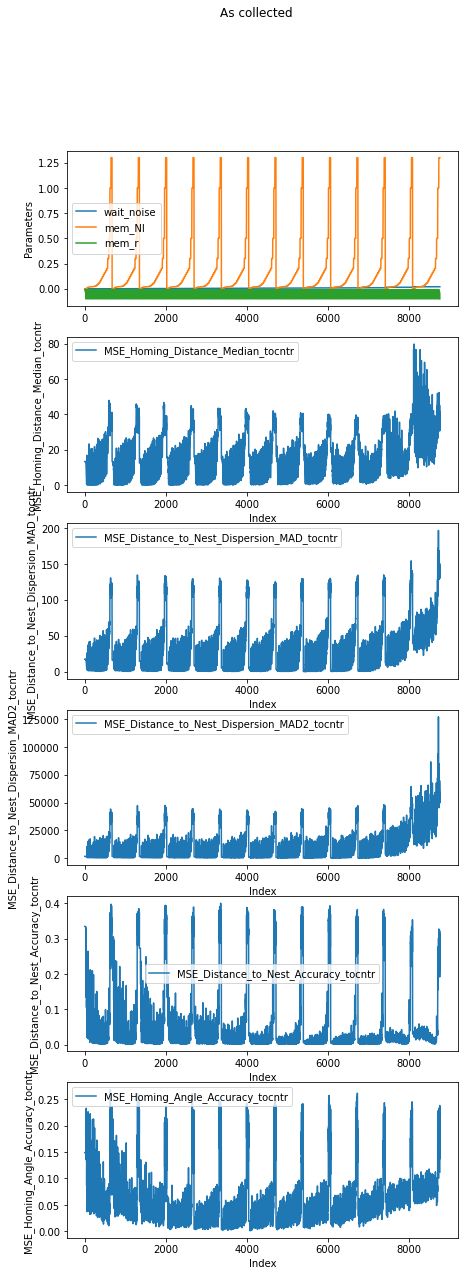

In [ ]:
# Plot in order of scanned parameter values
fig1, ax1 = plt.subplots(6, 1, figsize=(7,20))
ax1[0].plot(df['wait_noise'], label='wait_noise', color=f'C{0}')
ax1[0].plot(df['mem_Nl'], label='mem_Nl', color=f'C{1}')
ax1[0].plot(df['mem_r'], label='mem_r', color=f'C{2}')
ax1[0].set_ylabel('Parameters')
ax1[0].legend()

measures = ['MSE_Homing_Distance_Median', 'MSE_Distance_to_Nest_Dispersion_MAD', 'MSE_Distance_to_Nest_Dispersion_MAD2',  'MSE_Distance_to_Nest_Accuracy', 'MSE_Homing_Angle_Accuracy']
measures = ['MSE_Homing_Distance_Median_tocntr', 'MSE_Distance_to_Nest_Dispersion_MAD_tocntr', 'MSE_Distance_to_Nest_Dispersion_MAD2_tocntr', 'MSE_Distance_to_Nest_Accuracy_tocntr', 'MSE_Homing_Angle_Accuracy_tocntr']
#measures = ['MSE_Homing_Distance_Median_toturn', 'MSE_Distance_to_Nest_Dispersion_MAD_toturn', 'MSE_Distance_to_Nest_Dispersion_MAD2_toturn', 'MSE_Distance_to_Nest_Accuracy_toturn', 'MSE_Homing_Angle_Accuracy_toturn']

for inx1,measure in enumerate(measures):
  ax1[inx1+1].plot(df[measure], label=measure)
  ax1[inx1+1].set_ylabel(measure)
  ax1[inx1+1].set_xlabel('Index')
  ax1[inx1+1].legend()
fig1.suptitle('As collected')

Text(0.5, 0.98, 'As collected')

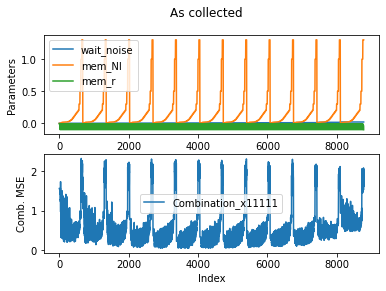

In [ ]:
# Plot in order of scanned parameter values
fig1, ax1 = plt.subplots(2, 1)
ax1[0].plot(df['wait_noise'], label='wait_noise', color=f'C{0}')
ax1[0].plot(df['mem_Nl'], label='mem_Nl', color=f'C{1}')
ax1[0].plot(df['mem_r'], label='mem_r', color=f'C{2}')
ax1[0].set_ylabel('Parameters')
ax1[0].legend()

ax1[1].plot(df['Combination_x11111'], label='Combination_x11111')
ax1[1].set_ylabel('Comb. MSE')
ax1[1].set_xlabel('Index')
ax1[1].legend()
fig1.suptitle('As collected')

Text(0.5, 0.98, 'Sorted by MSE')

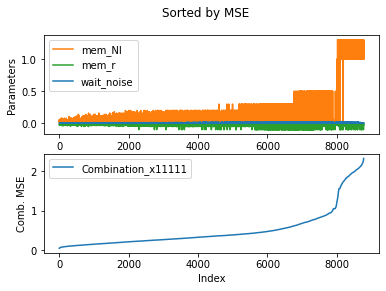

In [ ]:
# Plot sorted by the combined MSE
df2 = df.sort_values(by=['Combination_x11111'])
df2.index = range(len(df2))

fig2,ax2 = plt.subplots(2, 1)
ax2[0].plot(df2['mem_Nl'], label='mem_Nl', color=f'C{1}')
ax2[0].plot(df2['mem_r'], label='mem_r', color=f'C{2}')
ax2[0].plot(df2['wait_noise'], label='wait_noise', color=f'C{0}')
ax2[0].set_ylabel('Parameters')
ax2[0].legend()

ax2[1].plot(df2['Combination_x11111'], label='Combination_x11111')
ax2[1].set_ylabel('Comb. MSE')
ax2[1].set_xlabel('Index')
ax2[1].legend()
fig2.suptitle('Sorted by MSE')

,wait_noise,mem_Nl,mem_r,MSE_Homing_Distance_Median_tocntr,MSE_Homing_Distance_Median_toturn,MSE_Distance_to_Nest_Dispersion_MAD_tocntr,MSE_Distance_to_Nest_Dispersion_MAD_toturn,MSE_Distance_to_Nest_Dispersion_MAD2_tocntr,MSE_Distance_to_Nest_Dispersion_MAD2_toturn,MSE_Distance_to_Nest_Accuracy_tocntr,MSE_Distance_to_Nest_Accuracy_toturn,MSE_Homing_Angle_Accuracy_tocntr,MSE_Homing_Angle_Accuracy_toturn,Combination_x11111,Combination_x11111sq
370,0.006,0.001,-0.050,4.015661,4.693146,10.261431,4.847738,4964.345431,1494.673676,0.004352,0.017648,0.019588,0.017502,0.134270,0.089375
371,0.007,0.001,-0.050,2.276835,3.344480,9.948976,5.271467,5440.435691,1947.238502,0.002597,0.025411,0.027616,0.020707,0.138010,0.107049
372,0.008,0.001,-0.050,3.328405,6.491739,9.756170,7.120507,4955.678941,2746.392738,0.004105,0.025390,0.025588,0.020220,0.147407,0.104641
382,0.005,0.001,-0.045,2.969754,3.994877,6.042804,6.181868,2958.534768,2749.316507,0.012873,0.034139,0.019137,0.046409,0.140778,0.086683
383,0.006,0.001,-0.045,1.670270,3.175041,8.480501,5.393184,4320.526873,2246.042512,0.005522,0.038649,0.020391,0.023293,0.110779,0.080060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,0.004,0.140,-0.010,3.287204,1.831125,1.039922,1.336403,72.037570,68.247551,0.027897,0.076548,0.010681,0.026968,0.150788,0.090273
6297,0.005,0.140,-0.010,3.095614,3.687089,1.022323,2.206237,46.340338,136.475023,0.016298,0.058535,0.013025,0.008715,0.128130,0.074335
6299,0.007,0.140,-0.010,2.590175,2.971940,2.290889,2.929779,252.307092,161.927486,0.017904,0.061240,0.017170,0.021418,0.141261,0.084599
6311,0.006,0.140,-0.008,2.588933,2.942908,1.473358,2.905955,88.828222,144.775285,0.034158,0.047621,0.011091,0.012000,0.159214,0.100283


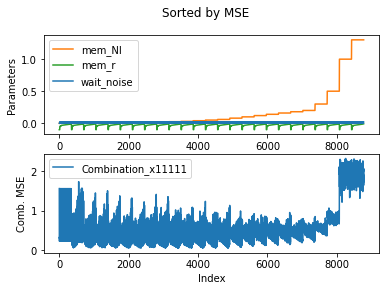

In [ ]:
# Plot sorted by the different parameters
df2 = df.sort_values(by=['mem_Nl', 'mem_r', 'wait_noise'])
df2.index = range(len(df2))


fig2,ax2 = plt.subplots(2, 1)
ax2[0].plot(df2['mem_Nl'], label='mem_Nl', color=f'C{1}')
ax2[0].plot(df2['mem_r'], label='mem_r', color=f'C{2}')
ax2[0].plot(df2['wait_noise'], label='wait_noise', color=f'C{0}')
ax2[0].set_ylabel('Parameters')
ax2[0].legend()

ax2[1].plot(df2['Combination_x11111'], label='Combination_x11111')
ax2[1].set_ylabel('Comb. MSE')
ax2[1].set_xlabel('Index')
ax2[1].legend()
fig2.suptitle('Sorted by MSE')

#ax2[0].set_xlim([0,10])
#ax2[1].set_xlim([0,10])
df2.loc[df2['Combination_x11111']<0.16]

0.0 0.002 0.003 0.004 0.005 0.006 0.008 0.01 0.012 0.014 0.016 0.018 0.019 0.02 0.021 0.022 0.025 0.03 0.035 0.04 0.05 0.06 0.07 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.25 0.3 

Text(0.5, 0, 'value(t)')

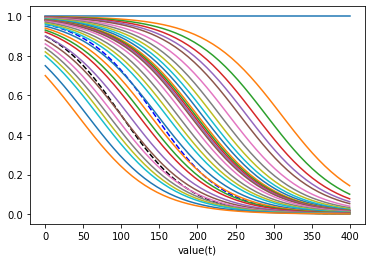

In [ ]:
def PopulationLoss1(t, K, Nl, r):
   return K / (1 + Nl/(K - Nl) * np.exp(-r * t))

t = np.linspace(0 , 400)
K, Nl, r = 12.79111889, 0.09954786, -0.0220668
K, Nl, r = 1, 0.09954786, -0.0220668

plt.plot(t, PopulationLoss1(t, K, Nl, r), '--', color='black')

plt.plot(t, PopulationLoss1(t, K, 0.04, r), '--', color='blue')

#for Nl in np.append(np.array([0.0]),np.logspace(np.log(0.03)/np.log(10), np.log(0.3)/np.log(10), 20)):
#for Nl in np.arange(0, 0.022, 0.002):
#for Nl in np.arange(0, 0.22, 0.02):
#for Nl in [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]:
#for Nl in [0.0, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]: # Denser sampling around the optimal point
#for Nl in np.arange(0.001, 0.3, 0.01):
#for Nl in [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.012, 0.015, 0.018, 0.019, 0.02, 0.021, 0.022, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3]: # Denser sampling around the optimal point
for Nl in  [0.0, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.019, 0.02, 0.021, 0.022, 0.025, 0.03, 0.035, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.25, 0.3]:
  r = -0.02 # mid -0.035, range -0.05 -- -0.02
  print(Nl, '', end='')
  plt.plot(t, PopulationLoss1(t, K, Nl, r))

plt.xlabel('t')
plt.xlabel('value(t)')

In [ ]:
# y = 10**x, x = np.log(y)/np.log(10)
# y_start to y_stop
y = np.array([0.02, 0.1, 0.4])
np.log(y)/np.log(10)
# np.logspace(x_start, x_stop) from 10**start to 10**stop

array([-1.69897   , -1.        , -0.39794001])

-0.015 -0.016 -0.017 -0.018 -0.019 -0.02 -0.021 -0.022 -0.023 -0.024 -0.025 -0.026 -0.027 -0.028 -0.029 -0.03 -0.031 -0.032 -0.033 -0.034 -0.035 -0.036 -0.037 -0.038 -0.039 -0.04 -0.041 -0.042 -0.043 -0.044 -0.045 -0.046 -0.047 -0.048 -0.049 -0.05 

Text(0.5, 0, 'value(t)')

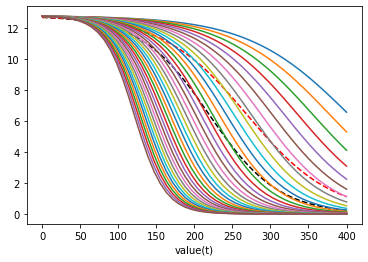

In [ ]:
def PopulationLoss1(t, K, Nl, r):
   return K / (1 + Nl/(K - Nl) * np.exp(-r * t))

t = np.linspace(0 , 400)
K, Nl, r = 12.79111889, 0.09954786, -0.0220668
plt.plot(t, PopulationLoss1(t, K, Nl, r), '--', color='black')

plt.plot(t, PopulationLoss1(t, K, Nl, -0.018), '--', color='red')

#for r in np.arange(0, -0.032, -0.002):
#for r in np.arange(-0.016, -0.03, -0.001):
#for r in np.arange(-0.05, -0.022, 0.001):
for r in [-0.015, -0.016, -0.017, -0.018, -0.019, -0.020, -0.021, -0.022, -0.023, -0.024, -0.025, -0.026, -0.027, -0.028, -0.029, -0.030, -0.031, -0.032, -0.033, -0.034, -0.035, -0.036, -0.037, -0.038, -0.039, -0.040, -0.041, -0.042, -0.043, -0.044, -0.045, -0.046, -0.047, -0.048, -0.049, -0.050]:
  Nl = 0.03 # mid 0.15, range 0.001--0.30
  print(r, '', end='')
  plt.plot(t, PopulationLoss1(t, K, Nl, r))

plt.xlabel('t')
plt.xlabel('value(t)')

0.001000 0.101000 0.201000 -0.050000 -0.049000 -0.048000 -0.047000 -0.046000 -0.045000 -0.044000 -0.043000 -0.042000 -0.041000 -0.040000 -0.039000 -0.038000 -0.037000 -0.036000 -0.035000 -0.034000 -0.033000 -0.032000 -0.031000 -0.030000 -0.029000 -0.028000 -0.027000 -0.026000 -0.025000 -0.024000 -0.023000 -0.022000 -0.021000 

Text(0.5, 0, 'value(t)')

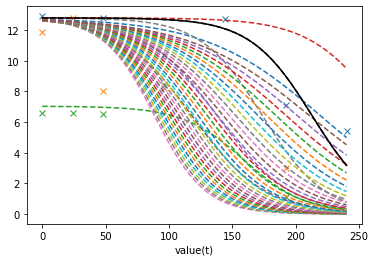

In [ ]:
def PopulationLoss1(t, K, Nl, r):
   return K / (1 + Nl/(K - Nl) * np.exp(-r * t))

t_2 = np.array([0, 48, 96, 144, 192, 240 ])
y_2 = np.array([12.9, 12.8, 10.4, 12.7, 7.1, 5.4])
plt.plot(t_2, y_2, 'x')

C_HoursInCaptivity = np.array([0, 24, 48, 96, 192])
C_Homing_Distance_Median_12m=np.array([11.9, 12.8, 8.0, 8.2, 3.0])
plt.plot(C_HoursInCaptivity, C_Homing_Distance_Median_12m, 'x')
C_Homing_Distance_Median_6m=np.array([6.6, 6.6, 6.5, 8.4, 1.1])
plt.plot(C_HoursInCaptivity, C_Homing_Distance_Median_6m, 'x')

t = np.linspace(0 , 240)
K, Nl, r = 12.79111889, 0.09954786, -0.0220668     # fit to the Ziegler1997
plt.plot(t, PopulationLoss1(t, K, Nl, r), '--', color=f'C{0}')

K, Nl, r =  7.03278735, 0.01,       -0.04114223    # fit to the Cheng2005 is steeper than Ziegler1997 curve and makes sense
plt.plot(t, PopulationLoss1(t, K, Nl, r), '--', color=f'C{2}')
K, Nl, r = 12.79111889, 0.01,       -0.04114223    # Combination: Cheng2005 scaled up to 12m
plt.plot(t, PopulationLoss1(t, K, Nl, r), '--', color='grey')
K, Nl, r = 12.79111889, 0.002,      -0.04114223    # Combination: Cheng2005 scaled up to 12m and shifted to the right
plt.plot(t, PopulationLoss1(t, K, Nl, r), '--', color='black')

# Explore Nl range
# Nl determines the x intercept (increasing Nl value shifts curves to the left)
#for Nl in [0.0010, 0.0012, 0.0014, 0.0016, 0.0018, 0.0020, 0.0022, 0.0024, 0.0025, 0.0030, 0.0035, 0.0040, 0.0045, 0.0050, 0.0060, 0.0070, 0.0080, 0.0090, 0.0100]:
#  r = -0.04 # mid -0.04, range -0.034---0.050
for Nl in np.arange(0.001, 0.3, 0.1):
  r = -0.035 # mid -0.035, range -0.05 -- -0.02
  print('{:8f} '.format(Nl), end='')
  plt.plot(t, PopulationLoss1(t, K, Nl, r), '--')

# Explore r range
# r determines the slope (reducing r value increases the steepness and the downwards knee comes more to the left)
#for r in [-0.034, -0.036, -0.037, -0.038, -0.039, -0.040, -0.041, -0.042, -0.043, -0.044, -0.045, -0.046, -0.047, -0.048, -0.049, -0.050]:
#  Nl = 0.002 # mid 0.002, range 0.0010--0.0100
for r in np.arange(-0.05, -0.02, 0.001):
  Nl = 0.15 # mid 0.15, range 0.001--0.30
  print('{:8f} '.format(r), end='')
  plt.plot(t, PopulationLoss1(t, K, Nl, r), '--')

K, Nl, r = 12.79111889, 0.002,      -0.04114223    # Combination: Cheng2005 scaled up to 12m and shifted to the right
plt.plot(t, PopulationLoss1(t, K, Nl, r), '-', color='black')

#plt.plot(t, PopulationLoss1(t, K, 0.02, -0.018), '--', color='red')

#plt.plot(t, PopulationLoss1(t, K, Nl, -0.026), '--', color='blue') # lower r steeper but also moves to the left
#plt.plot(t, PopulationLoss1(t, K, 0.14, r), '--', color='green') # higher Nl moves to the left

#plt.plot(t, PopulationLoss1(t, K, 0.005, -0.036), '--', color='blue') 

plt.xlabel('t')
plt.xlabel('value(t)')

Text(0.5, 0.98, 'Sorted by mem_Nl, wait_noise')

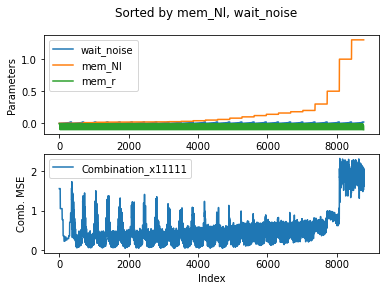

In [ ]:
# Plot sorted by the two of the model parameters
df2 = df.sort_values(by=['mem_Nl', 'wait_noise'])
df2.index = range(len(df2))

fig2,ax2 = plt.subplots(2, 1)
ax2[0].plot(df2['wait_noise'], label='wait_noise', color=f'C{0}')
ax2[0].plot(df2['mem_Nl'], label='mem_Nl', color=f'C{1}')
ax2[0].plot(df2['mem_r'], label='mem_r', color=f'C{2}')
ax2[0].set_ylabel('Parameters')
ax2[0].legend()

ax2[1].plot(df2['Combination_x11111'], label='Combination_x11111')
ax2[1].set_ylabel('Comb. MSE')
ax2[1].set_xlabel('Index')
ax2[1].legend()
fig2.suptitle('Sorted by mem_Nl, wait_noise')

Text(0.5, 0.98, 'Sorted by mem_r, wait_noise')

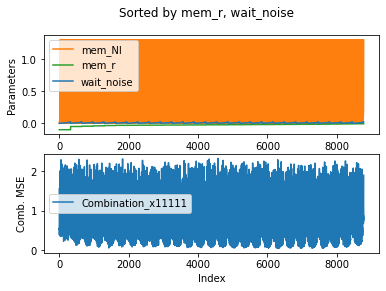

In [ ]:
# Plot sorted by other two of the model parameters
df2 = df.sort_values(by=['mem_r', 'wait_noise'])
df2.index = range(len(df2))

fig2,ax2 = plt.subplots(2, 1)
ax2[0].plot(df2['mem_Nl'], label='mem_Nl', color=f'C{1}')
ax2[0].plot(df2['mem_r'], label='mem_r', color=f'C{2}')
ax2[0].plot(df2['wait_noise'], label='wait_noise', color=f'C{0}')
ax2[0].set_ylabel('Parameters')
ax2[0].legend()

ax2[1].plot(df2['Combination_x11111'], label='Combination_x11111')
ax2[1].set_ylabel('Comb. MSE')
ax2[1].set_xlabel('Index')
ax2[1].legend()
fig2.suptitle('Sorted by mem_r, wait_noise')

Text(0.5, 0.98, 'Sorted by wait_noise, mem_Nl')

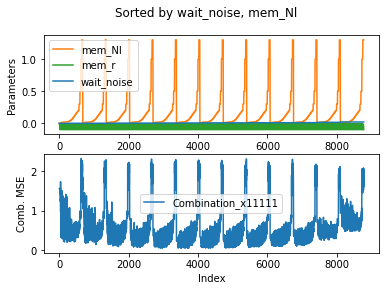

In [ ]:
# Plot sorted by other two of the model parameters
df2 = df.sort_values(by=['wait_noise', 'mem_Nl'])
df2.index = range(len(df2))

fig2,ax2 = plt.subplots(2, 1)
ax2[0].plot(df2['mem_Nl'], label='mem_Nl', color=f'C{1}')
ax2[0].plot(df2['mem_r'], label='mem_r', color=f'C{2}')
ax2[0].plot(df2['wait_noise'], label='wait_noise', color=f'C{0}')
ax2[0].set_ylabel('Parameters')
ax2[0].legend()

ax2[1].plot(df2['Combination_x11111'], label='Combination_x11111')
ax2[1].set_ylabel('Comb. MSE')
ax2[1].set_xlabel('Index')
ax2[1].legend()
fig2.suptitle('Sorted by wait_noise, mem_Nl')

From the above using only the originally limited range of parameter values it seems that the combination of parameters:

wait_noise (diffusion coef.) =             0.005000

mem_Nl                       =             0.040000

mem_r                        =            -0.018000

will give a decent replication of ant behaviour. 

From the above with the extended range of parameter values it seems that the combination of parameters (considering the match to the model for just the first 8 waiting time periods as in the Ziegler1997 paper):

wait_noise (diffusion coef.) =             0.004000

mem_Nl                       =             0.022000

mem_r                        =            -0.018000

will give a decent replication of ant behaviour. 

From the above with the extended range of parameter values it seems that the combination of parameters (considering the match to the model for all 11 waiting time periods extending beyond the Ziegler1997 paper):

wait_noise (diffusion coef.) =             0.004000

mem_Nl                       =             0.030000

mem_r                        =            -0.014000

will give a decent replication of ant behaviour. 
